In [40]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_colwidth', None)

# <font color='blue'><p style="font-size: 40px;"><b>Mental Health in Tech Industry</b></p>

### "Embark on an exploration of mental health in the Tech Industry through a rich dataset. Uncover insights on demographics, survey trends, and potential correlations impacting professionals' well-being. Let's delve into key questions to illuminate the intricate intersection of mental health and the tech workplace."

## Connection

In [41]:
conn = sqlite3.connect('Data/mental_health.sqlite')

## Functions

##### "About"
- This is a section to define the functions that will be used during the analysis.

### Selects

In [42]:
def select_from(columns, table) -> pd.DataFrame:
    """
    Executes a SQL SELECT query to retrieve specified columns from a given table.

    Args:
        columns (list): A list of column names to be selected.
        table (str): The name of the table from which to select columns.

    Returns:
        pandas.DataFrame: A DataFrame containing the result of the SELECT query.

    Raises:
        ValueError: If the 'columns' parameter is empty.
        ValueError: If the 'table' parameter is empty.

    Example:
        >>> columns_to_select = ['column1', 'column2']
        >>> table_name = 'example_table'
        >>> result_dataframe = select_from(columns_to_select, table_name)
    """
    query = "SELECT {} FROM {}".format(','.join(columns), table)
    result_df = pd.read_sql_query(query, conn)
    return result_df

In [43]:
def select_from_where(columns, table, condition_column, condition_value) -> pd.DataFrame:
    """
    Executes a SQL SELECT query to retrieve specified columns from a given table with a WHERE clause.

    Args:
        columns (list): A list of column names to be selected.
        table (str): The name of the table from which to select columns.
        condition_column (str): The column on which to apply the WHERE clause condition.
        condition_value: The value used in the WHERE clause condition.

    Returns:
        pandas.DataFrame: A DataFrame containing the result of the SELECT query with the specified condition.

    Raises:
        ValueError: If the 'columns' parameter is empty.
        ValueError: If the 'table' parameter is empty.
        ValueError: If the 'condition_column' parameter is empty.
        ValueError: If the 'condition_value' parameter is empty.

    Example:
        >>> columns_to_select = ['column1', 'column2']
        >>> table_name = 'example_table'
        >>> condition_column = 'column3'
        >>> condition_value = 42
        >>> result_dataframe = select_from_where(columns_to_select, table_name, condition_column, condition_value)
    """
    query = "SELECT {} FROM {} WHERE {} = ?".format(
        ','.join(columns), table, condition_column)
    result_df = pd.read_sql_query(query, conn, params=(condition_value,))
    return result_df

### Barplots

#### Plot Functions

In [44]:
def create_barplot(data, x, y, title, xlabel, ylabel):
    """
    Creates a bar plot using Seaborn with the specified data and plot attributes.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data to be plotted.
        x (str): The column name for the x-axis.
        y (str): The column name for the y-axis.
        title (str): The title of the bar plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.

    Returns:
        plot

    Raises:
        ValueError: If the 'data' parameter is not a valid pandas DataFrame.
        ValueError: If either 'x' or 'y' parameter is not a valid column in the DataFrame.

    Example:
        >>> import seaborn as sns
        >>> import pandas as pd
        >>> create_barplot(my_dataframe, 'column_x', 'column_y', 'My Bar Plot', 'X-axis Label', 'Y-axis Label')
    """
    ax = sns.barplot(x=x, y=y, data=data)
    sns.despine()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return ax

In [45]:
def create_barplot_hue(data, x, y, hue, title, xlabel, ylabel):
    """
    Creates a bar plot using Seaborn with the specified data and plot attributes, incorporating hue.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data to be plotted.
        x (str): The column name for the x-axis.
        y (str): The column name for the y-axis.
        hue (str): The column name to differentiate bars by color.
        title (str): The title of the bar plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.

    Returns:
        None

    Raises:
        ValueError: If the 'data' parameter is not a valid pandas DataFrame.
        ValueError: If either 'x' or 'y' parameter is not a valid column in the DataFrame.
        ValueError: If 'hue' parameter is not a valid column in the DataFrame.

    Example:
        >>> import seaborn as sns
        >>> import pandas as pd
        >>> create_barplot_hue(my_dataframe, 'column_x', 'column_y', 'category_column', 'My Bar Plot with Hue', 'X-axis Label', 'Y-axis Label')
    """
    sns.barplot(x=x, y=y, hue=hue, data=data)
    sns.despine()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


#### Label Plots

In [46]:
def add_percentage_to_plot(ax):
    total_height = sum([bar.get_height() for bar in ax.patches])

    # Add percentage labels to each bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
                f'{height / total_height:.1%}', ha='center', va='bottom')

## Tables

##### "About"
- This is a section to present how the Database looks like and how many tables are within.

### Survey Table

In [47]:
survey_table = select_from(['*'], 'Survey')
survey_table

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


##### "Analysis"
- The data spans a total of 5 years, but there is an absence of information for the year 2015. It's possible that the survey did not take place during that year.

### Question Table

In [48]:
question_table = select_from(['*'], 'Question')
question_table

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,114
101,"If yes, what condition(s) have you been diagnosed with?",115
102,"If maybe, what condition(s) do you believe you have?",116
103,Which of the following best describes your work position?,117


##### "Analysis"
- There is a total of 105 questions, but the "questionid" numbering goes up to 118. This suggests that some questions might have been deleted or lost in the dataset, as there are jumps from question 34 to question 48.

### Answer Table

In [49]:
answer_table = select_from(['*'], 'Answer')
answer_table

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


##### "Analysis"
- There is a total of 236,898 answers in the dataset.

## Checking Answer Table

##### "About"
This is a section to understand more about:
- How many users answered the Survey ?
- How many users are distribuided per year ?
- How many answers per year ?
- What are the most common answered questions in the Survey by total Users ?

### Total Users

In [50]:
query = """
SELECT 
    COUNT(DISTINCT Answer.UserID) as TotalUsers
FROM 
    Answer
JOIN
    Survey ON Survey.SurveyID=Answer.SurveyID
"""
df = pd.read_sql_query(query, conn)
df

,TotalUsers
0,4218


### Total Users Per Year

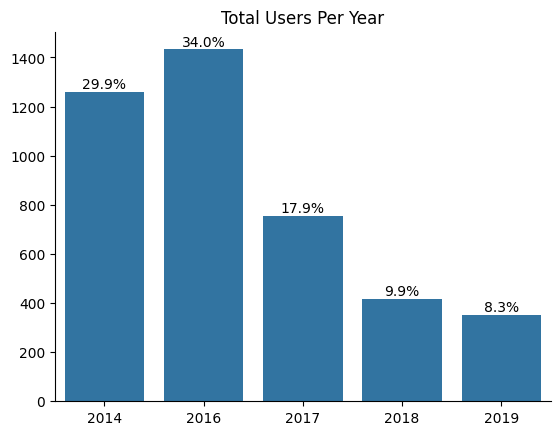

In [85]:
query = """
SELECT 
    Answer.SurveyID,
    COUNT(DISTINCT Answer.UserID) as TotalUsers
FROM 
    Answer
JOIN
    Survey ON Survey.SurveyID=Answer.SurveyID
GROUP BY
    Answer.SurveyID
"""
df = pd.read_sql_query(query, conn)
ax = create_barplot(df, 'SurveyID', 'TotalUsers', 'Total Users Per Year', '', '')
add_percentage_to_plot(ax)

##### "Analysis"
- The year 2016 witnessed the highest number of respondents to the survey.

### Total Answers per Year

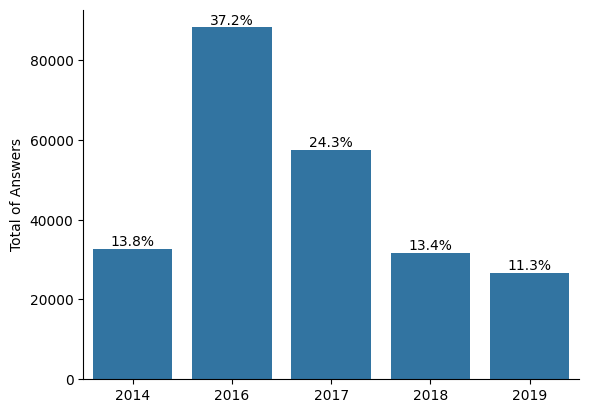

In [86]:
df = pd.DataFrame(answer_table.groupby(by='SurveyID').count()['AnswerText'])
ax = create_barplot(df, 'SurveyID', 'AnswerText', '', '', 'Total of Answers')
add_percentage_to_plot(ax)

##### "Analysis"
- Across each year, there are varying counts of "AnswerText."
- There's a possibility that certain questions were not mandatory, leading to fluctuations in response counts. People might have been hesitant to answer those questions, or the survey could have been perceived as lengthy.

### Most Common Answered Questions

In [53]:
query = """
SELECT 
    Question.QuestionID as QuestionId,
    COUNT(AnswerText) as TotalUsersAnswered
FROM 
    Question
JOIN
    Answer ON Question.QuestionID=Answer.QuestionID
GROUP BY 
    Question.QuestionID
"""
df = pd.read_sql_query(query, conn)

# Group by 'TotalUsersAnswered' and aggregate 'QuestionId' as a list
df_grouped = df.groupby('TotalUsersAnswered')['QuestionId'].apply(list).reset_index(name='QuestionIdList').sort_values(by='TotalUsersAnswered', ascending=False).reset_index(drop=True)
df_grouped

,TotalUsersAnswered,QuestionIdList
0,4218,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
1,2958,"[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56]"
2,2693,"[90, 91]"
3,2692,[117]
4,2072,[115]
5,1793,[116]
6,1525,"[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]"
7,1433,"[104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 118]"
8,1260,"[92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103]"


##### "Analysis"
- The table indicates that everyone in the survey answered questions 1-12.
- However, the number of questions answered begins to decrease notably.
- It's noteworthy that participants did not follow a specific order when answering the questions.
- Excluding the first 12 questions, 2,692 respondents answered question 117, 2,072 answered question 115, and 1,793 answered question 116.
- Subsequently, fewer people answered the preceding questions.

## Analysis

##### "About"
- Now we are going to dive more into the questions found to be the most common ones (1-12).
- First, let's see what are those 12 questions.
- Secondly, create a Demographic based on the first 3 questions (Age, Gender and Country).
- Thirdly, analyze one of those countries and the outcomes that we can get from it.
- And finally, analyze the correlation between some of those questions.

### First 12 Questions

In [54]:
question_table.head(12)

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


##### "Analysis"
- These are the 12 questions that all users answered.

### Demographics

##### "Intro"
- This section is designed to showcase the demographics derived from the initial three questions from the "Answer" table.

#### Age

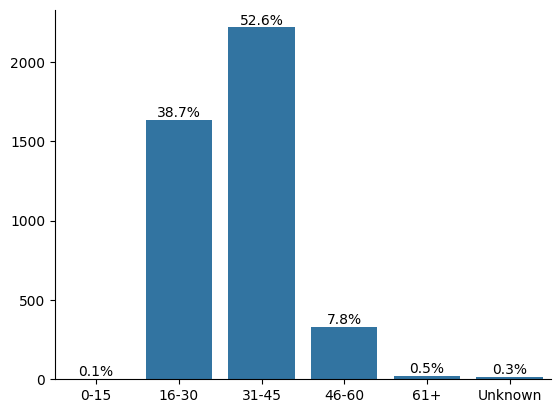

In [77]:
query = """
SELECT 
    COUNT(Answer.UserID) as Total, 
    CASE
        WHEN Answer.AnswerText BETWEEN 0 AND 15 THEN '0-15'
        WHEN Answer.AnswerText BETWEEN 16 AND 30 THEN '16-30'
        WHEN Answer.AnswerText BETWEEN 31 AND 45 THEN '31-45'
        WHEN Answer.AnswerText BETWEEN 46 AND 60 THEN '46-60'
        WHEN Answer.AnswerText > 61 THEN '61+'
        ELSE 'Unknown'
    END as AgeGroup
FROM 
    Answer
JOIN 
    Question ON Question.QuestionID = Answer.QuestionID
WHERE 
    Question.QuestionID = 1
GROUP BY 
    AgeGroup
"""
df = pd.read_sql_query(query, conn)
ax = create_barplot(df, 'AgeGroup', 'Total', '', '', '')
add_percentage_to_plot(ax)

##### "Analysis"
- The survey predominantly includes responses from young adults and adults, with the majority falling within the 31-45 age range.

#### Gender

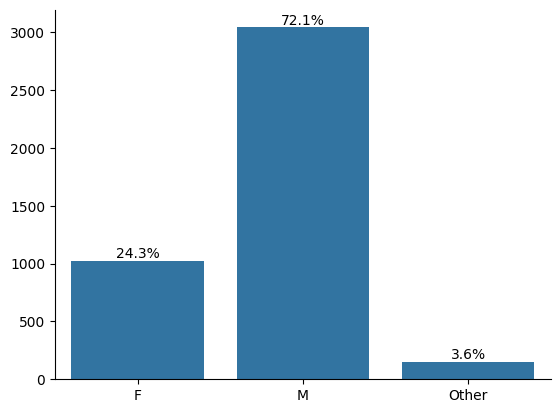

In [87]:
query = """
SELECT 
    COUNT(Answer.UserID) as Total, 
    CASE
        WHEN LOWER(Answer.AnswerText) = 'male' THEN 'M'
        WHEN LOWER(Answer.AnswerText) = 'female' THEN 'F'
        ELSE 'Other'
    END as Gender
FROM 
    Answer
JOIN 
    Question ON Question.QuestionID = Answer.QuestionID
WHERE 
    Question.QuestionID = 2
GROUP BY 
    Gender
"""
df = pd.read_sql_query(query, conn)
ax = create_barplot(df, 'Gender', 'Total', '' ,'' ,'')
add_percentage_to_plot(ax)

##### "Analysis"
- Most survey responses were provided by males, followed by females.

#### Nationality

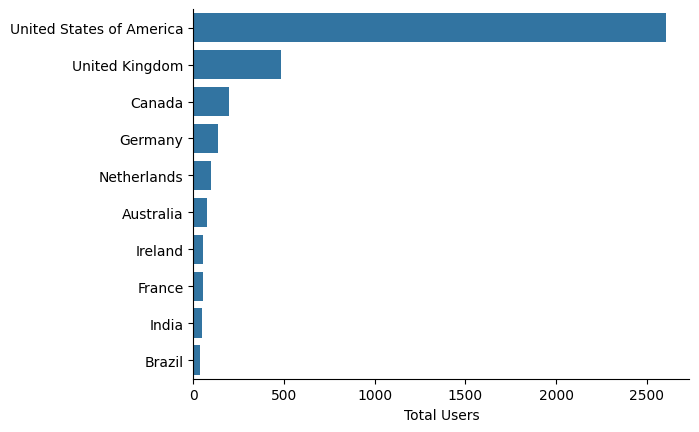

In [83]:
query = """
SELECT 
    COUNT(Answer.UserID) as TotalUsers, 
    Answer.AnswerText
FROM 
    Answer
JOIN 
    Question ON Question.QuestionID = Answer.QuestionID
WHERE 
    Question.QuestionID = 3
GROUP BY
    Answer.AnswerText
ORDER BY
    TotalUsers DESC 
"""
df = pd.read_sql_query(query, conn)

df.loc[df['AnswerText'].str.contains('United States', regex=True, na=False), 'AnswerText'] = 'United States of America'

sorted_df = df.groupby(by='AnswerText').sum().sort_values(by='TotalUsers', ascending=False).head(10)
create_barplot(sorted_df, 'TotalUsers', 'AnswerText', '' ,'Total Users' ,'')
plt.show()

##### "Analysis"
- The data reveals responses from 81 different nationalities in the survey.
- The USA has the highest number of survey participants, significantly surpassing the second-place country, the United Kingdom.
- Given the focus on Mental Health in the Tech Industry, the higher number of American respondents is understandable.
- Now, let's explore how Americans answered the remaining questions.

### USA

##### "About"
- USA is the country that has most of the Users from.
- On this section, I want to analyze deeper how those people answered some specific questions.
- The questions that I'll be analysing are number 5, 6 and 7. Which I believed to be the most related to mental health combined with the Tech industry.
- After that, I'll combine the answers from questions 5, 6 and 7 to see if those people work in the Tech industry (Question 9).
- With that in mind, we can detect if those people would or would not bring this subject during an interview (Question 12).
- And finish with a correlation between those questions to confirm the hypothesis of "Are people in the Tech industry more highly to be diagnosed with mental disorder and bring this subject during a job interview?".

#### Question 5 - Are you self-employed?

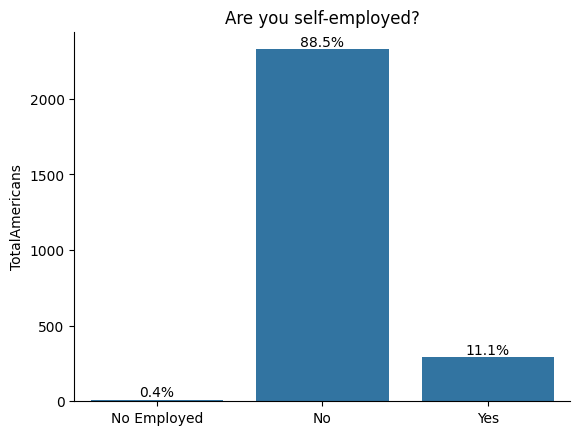

In [64]:
query = """
SELECT
    CASE WHEN AnswerText = 0 THEN 'No' 
         WHEN AnswerText = 1 THEN 'Yes'
        WHEN AnswerText = -1 THEN 'No Employed'
         ELSE AnswerText 
    END as AnswerText,
    COUNT(DISTINCT UserID) as TotalAmericans,
    AnswerText as Answer
FROM
    Answer
WHERE UserID IN
    (
        SELECT 
            UserID
        From 
            Answer
        Where
            AnswerText LIKE '%States%'
    )
    AND QuestionID = 5
GROUP BY
    AnswerText
"""
question5 = pd.read_sql_query(query, conn)
ax = create_barplot(question5, 'AnswerText', 'TotalAmericans', 'Are you self-employed?', '', 'TotalAmericans')
add_percentage_to_plot(ax)

##### "Analysis"
- The majority of Americans are not self-employed, indicating that they likely work for a company.

#### Question 6 - Do you have a family history of mental illness?

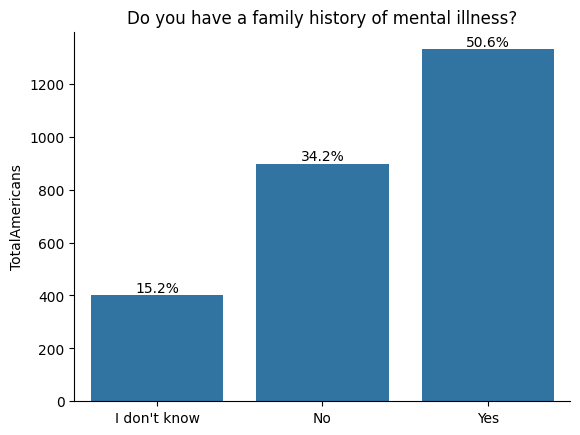

In [66]:
query = """
SELECT
    COUNT(DISTINCT UserID) as TotalAmericans,
    AnswerText as Answer
FROM
    Answer
WHERE UserID IN
    (
        SELECT 
            UserID
        From 
            Answer
        Where
            AnswerText LIKE '%States%'
    )
    AND QuestionID = 6
GROUP BY
    AnswerText
"""
question6 = pd.read_sql_query(query, conn)
ax = create_barplot(question6, 'Answer', 'TotalAmericans', 'Do you have a family history of mental illness?', '', 'TotalAmericans')
add_percentage_to_plot(ax)
plt.show()

##### "Analysis"
- Approximately 900 Americans don't have a family history of mental illness, while around 1,400 do.

#### Question 7 - Have you ever sought treatment for a mental health disorder from a mental health professional?

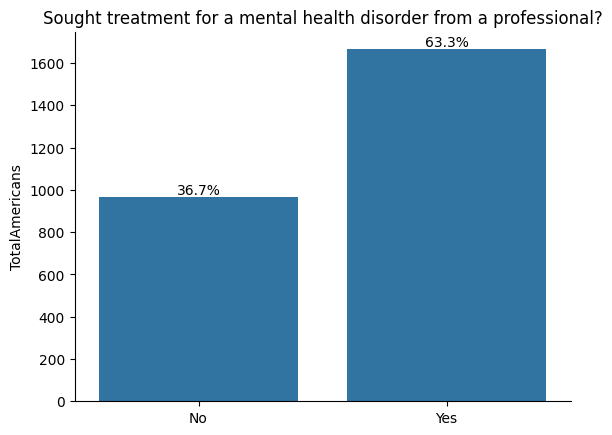

In [89]:
query = """
SELECT
    CASE WHEN AnswerText = '0' THEN 'No' 
         WHEN AnswerText = '1' THEN 'Yes' 
         ELSE AnswerText 
    END as AnswerText,
    COUNT(DISTINCT UserID) as TotalAmericans
FROM
    Answer
WHERE UserID IN
    (
        SELECT 
            UserID
        From 
            Answer
        Where
            AnswerText LIKE '%States%'
    )
    AND QuestionID = 7
GROUP BY
    AnswerText
"""
question7 = pd.read_sql_query(query, conn)
ax = create_barplot(question7, 'AnswerText', 'TotalAmericans', 'Sought treatment for a mental health disorder from a professional?', '', 'TotalAmericans')
add_percentage_to_plot(ax)
plt.show()

##### "Analysis"
- Approximately 1,700 individuals have sought treatment for a mental health disorder, suggesting a possible connection with a family history of mental health issues.
- On the other hand, nearly 1,000 people did not seek treatment for mental health disorders.
- Now, with this information from Questions 5, 6, and 7, let's explore specific questions to determine if there's any correlation between these aspects in the Tech Industry.

#### Question 9 - Is your employer primarily a tech company/organization?

"About"
- On this question, I'm taking into consideration the previous answers, like:
- People that are not self-employed.
- People that has a family history of mental illness.
- People that sought treatment for mental health disorder from a professional.

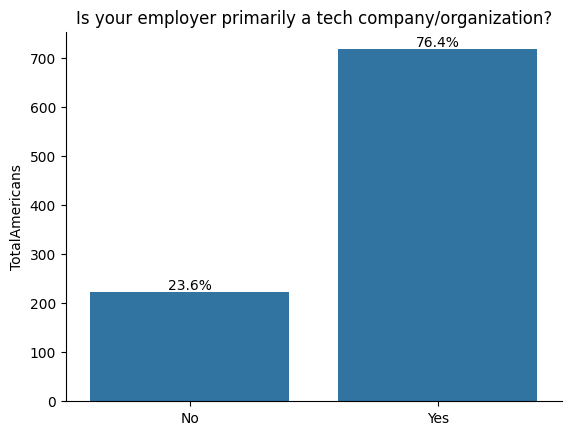

In [68]:
query = """
SELECT
    CASE WHEN AnswerText_Question9 = '0' THEN 'No' 
         WHEN AnswerText_Question9 = '1' THEN 'Yes' 
         ELSE AnswerText_Question9 
    END as AnswerText,
    COUNT(DISTINCT UserID) as TotalUsers
FROM (
    SELECT DISTINCT
        UserID,
        MAX(CASE WHEN QuestionID = 9 THEN AnswerText END) as AnswerText_Question9
    FROM Answer
    WHERE 
        UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 3 AND AnswerText LIKE 'United States%'
        )
        AND UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 5 AND AnswerText = 0
        )
        AND UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 6 AND AnswerText = 'Yes'
        )
        AND UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 7 AND AnswerText = 1
        )
    GROUP BY UserID
) AS Subquery
GROUP BY AnswerText;
"""
question9 = pd.read_sql_query(query, conn)
ax = create_barplot(question9, 'AnswerText', 'TotalUsers', 'Is your employer primarily a tech company/organization?', '', 'TotalAmericans')
add_percentage_to_plot(ax)
plt.show()

##### "Analysis"
- Among the Americans surveyed who answered the last 3 questions we analyzed, approximately 80% work in the Tech industry, have a family history of mental health disorders, and have sought treatment.
- This suggests that the Tech Industry in the USA may have a higher percentage of people working while dealing with mental illness. This could explain the increased instances of burnouts in recent years and the high turnover rate within companies in this industry.
- Several factors, such as long working hours, limited free time, and pressure to meet project deadlines, may contribute to this situation.

#### Question 12 - Would you bring up a mental health issue with a potential employer in an interview?

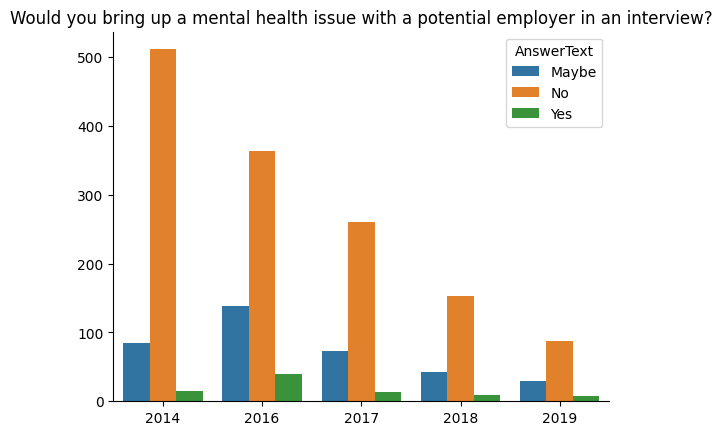

In [73]:
query = """
SELECT
    SurveyID,
    AnswerText,
    COUNT(DISTINCT UserID) as TotalAmericans
FROM
    Answer
WHERE 
    UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 3 AND AnswerText LIKE 'United States%'
        )
    AND UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 9 AND AnswerText = 1
        )
    AND QuestionID = 12
GROUP BY
    SurveyID, AnswerText
"""
question12 = pd.read_sql_query(query, conn)
create_barplot_hue(question12, 'SurveyID', 'TotalAmericans', 'AnswerText', 'Would you bring up a mental health issue with a potential employer in an interview?', '', '')

##### "Analysis"
- Over the years, Americans working in the tech industry avoid discussing mental health issues in interviews.
- This indicates that mental health challenges are prevalent in this industry. The fact that most people avoid discussing it during interviews suggests that mental health problems are common.
- While some individuals might bring up mental health in interviews, the majority do not.
- The fear of not getting hired might be why fewer people in this group mention mental health compared to other groups.

### Correlation Between Questions 5, 6, 7, 9 and 12

"About"
- To confirm our hypothesis, let's check the correlation between those questions analyzed before.
- By creating a correlation with those question's answers.

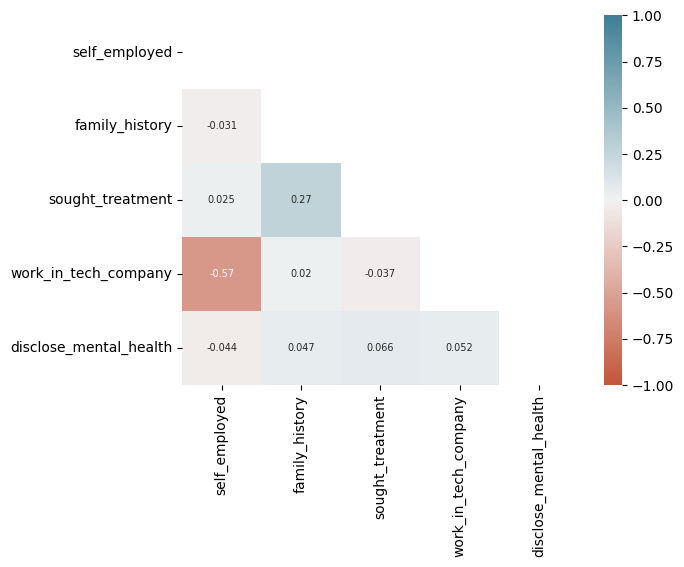

In [76]:
query = """
SELECT
    MAX(CASE WHEN QuestionID = 5 THEN AnswerText END) AS self_employed,
    MAX(CASE WHEN QuestionID = 6 THEN 
        CASE WHEN AnswerText = 'No' THEN 0 
             WHEN AnswerText = 'Yes' THEN 1
             WHEN AnswerText = 'I don''t know' THEN -1
        END
    END) AS family_history,
    MAX(CASE WHEN QuestionID = 7 THEN AnswerText END) AS sought_treatment,
    MAX(CASE WHEN QuestionID = 9 THEN AnswerText END) AS work_in_tech_company,
    MAX(CASE WHEN QuestionID = 12 THEN 
        CASE WHEN AnswerText = 'No' THEN 0 
             WHEN AnswerText = 'Yes' THEN 1
             WHEN AnswerText = 'Maybe' THEN -1
        END
    END) AS disclose_mental_health
FROM
    Answer
WHERE
    QuestionID IN (5, 6, 7, 9, 12)
GROUP BY
    UserID;
"""
answers = pd.read_sql_query(query, conn)
answers = answers.corr('spearman')

mask = np.zeros_like(answers)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(answers,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize': 7},
            mask=mask,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

##### "Analysis"
- Discovering interesting facts through correlations.
- The connection between "self_employed" and "work_in_tech_company" is minimal. Being self-employed doesn't always mean working in a Tech organization. There's a small link between "sought_treatment" and "disclose_mental_health" as people seeking mental health treatment can indirectly impact work performance. Discussing this in a job interview might influence the hiring decision.
- Additionally, "family_history" and "disclose_mental_health" also has a small correlation. Employees with family members having mental health issues are more likely to face mental health challenges themselves. Bringing up this topic in an interview could lead to concerns about potential burnouts or decreased productivity under pressure from clients.
- The strongest correlation comes between "sought_treatment" and "family_history". Which it makes us believe that those people already have some tendency to develop a mental health disorder over the years.

## Conclusion


- In conducting the analysis, several key findings and patterns have emerged from the provided dataset. The survey encompasses responses from a diverse group of individuals, with a significant focus on the mental health of those working in the Tech Industry. Notable trends include a predominant representation of young adults and individuals aged 31-45, a higher participation of males, and a substantial presence of respondents from the USA.

- Examining the survey's chronological data, it is evident that 2016 witnessed the highest participation, although it is important to note the absence of data for the year 2015. The distribution of "AnswerText" across the years reveals fluctuations, potentially indicating that certain questions were not mandatory or perceived as lengthy, influencing respondents' choices.

- The analysis also delves into the order and extent to which questions were answered. Despite all participants responding to questions 1-12, a decline in the number of questions answered is observed, suggesting potential participant hesitation or survey fatigue. Additionally, the dataset's question numbering reveals gaps, hinting at the possibility of deleted or lost questions.

- In preparation for a detailed analysis, specific questions (e.g., 5, 6, 7) have been identified as the basis for further exploration, particularly within the context of the Tech Industry. These questions will be examine to unveil correlations and insights regarding mental health, work conditions, and their impact on respondents. Overall, this preliminary examination sets the stage for a comprehensive analysis to uncover nuanced trends and implications within the dataset.

- In summary, our look into the info suggests that mental health and work are connected, even if for a small percentage. If you're self-employed, it doesn't necessarily mean you're in tech. Seeking mental health help (Question 7) can affect job performance and hiring decisions. Also, if family members had mental health issues (Question 6), it's linked to facing similar challenges (Question 12) at work, like feeling overwhelmed or having a hard time when things get tough. This shows how mental health, family history, and work are all tied together, highlighting the need for supportive workplaces to deal with these things.

- Analyzing the data suggests a link between mental health and the tech industry job search. While concerns about burnout may influence hiring decisions, it doesn't necessarily prevent discussing mental health in interviews or hinder job prospects.

## What could be improved ?

- Exploring patterns in question response rates can shed light on the reasons behind fluctuations, aiding our understanding of the decline in response rates over the years

- Relevant to explore: Assessing outcomes for candidates who disclosed mental health disorders during interviews to determine hiring success.